## <font color='#008000'>Required imports</font> 

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random

import pickle

2022-08-26 17:53:28.504737: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-26 17:53:28.504762: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Load the dataset 

X = img, y = label

In [2]:
(train_img, train_label), (test_img, test_label) = datasets.cifar10.load_data()

In [3]:
train_img.shape

(50000, 32, 32, 3)

In [4]:
test_img.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 10000 test images

In [5]:
train_label.shape

(50000, 1)

In [6]:
train_label[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

train_label is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:
train_label = train_label.reshape(-1)
train_label[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## Plotting some images to see what they are 

In [9]:
def plot_sample(img, label, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(img[index])
    plt.xlabel(classes[label[index]])

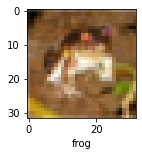

In [10]:
plot_sample(train_img, train_label, 0)

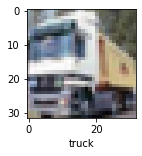

In [11]:
plot_sample(train_img, train_label, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

## Normalize the training data

In [12]:
train_img = train_img / 255
test_img = test_img /255

# Here we will perform classification with ANN and CNN, to see the difference in accuracy.

### Building Artificial Neural Network for image classification

In [13]:
# ann = models.Sequential([
#         layers.Flatten(input_shape=(32,32,3)),
#         layers.Dense(3000, activation='relu'),
#         layers.Dense(1000, activation='relu'),
#         layers.Dense(10, activation='softmax')    
# ])

## Compiling Artificial Neural Network

In [14]:
# ann.compile(optimizer = 'SGD',
#            loss = 'sparse_categorical_crossentropy',
#             metrics = ['accuracy'])

## Training Artificial Neural Network  

In [15]:
# ann.fit(train_img, train_label, epochs = 3)

You can see that at the end of 5 epochs, accuracy is at around %48

In [16]:
# from sklearn.metrics import confusion_matrix , classification_report
# import numpy as np

# pred_label = ann.predict(test_img)
# pred_label_classes = [np.argmax(element) for element in pred_label]

# print("Classification Report: \n", classification_report(test_label, pred_label_classes))

### Building Convolutional neural network for image classification

In [17]:
cnn = models.Sequential([
    
    # This is the first convolutional layer with max pooling, we can use as many as possible according to need, also we can use average pooling   
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),    
    
    # This is the second convolutional layer with max pooling
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)), 
        
    
    layers.Flatten(),
    # Here we don't need to make extra dense layer because we have used cnn above, it will optimize it automatically     
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')    

])

2022-08-26 17:53:31.020094: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-26 17:53:31.020114: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-26 17:53:31.020127: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (user-H410M-H-V3): /proc/driver/nvidia/version does not exist
2022-08-26 17:53:31.020275: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Compiling Convolutional Neural Network 

In [18]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

## Training Convolutional Neural Network 

In [19]:
cnn.fit(train_img, train_label, epochs=5)

Epoch 1/5


2022-08-26 17:53:31.422870: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 17s 11ms/step - loss: 1.4709 - accuracy: 0.4741
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1501 - accuracy: 0.5965
Epoch 3/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0295 - accuracy: 0.6411
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9460 - accuracy: 0.6695
Epoch 5/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8844 - accuracy: 0.6891


#### With CNN, at the end 5 epochs, accuracy was at around 75% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

## Saving trained model

In [20]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(cnn, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://2cac32d1-eef8-4f20-8acd-4437e832b426/assets


INFO:tensorflow:Assets written to: ram://2cac32d1-eef8-4f20-8acd-4437e832b426/assets


## load the saved model

In [21]:
loaded_model = pickle.load(open(filename, 'rb'))

## Predicting test_img

In [22]:
pred_label = cnn.predict(test_img)
pred_label[:5]

313/313 [==============================] - 1s 3ms/step


array([[2.96175433e-03, 1.36976119e-03, 2.48684231e-02, 4.61637110e-01,
        9.84799350e-04, 1.33512124e-01, 1.15724824e-01, 7.35707406e-04,
        2.57526606e-01, 6.78880024e-04],
       [7.42369965e-02, 1.14907838e-01, 1.83694952e-04, 7.58209808e-06,
        4.46856848e-06, 2.17002452e-07, 3.32827028e-07, 6.69380370e-07,
        7.98279762e-01, 1.23784514e-02],
       [1.49206147e-01, 1.68763325e-01, 2.15035607e-03, 7.51411775e-03,
        2.14729249e-03, 1.53031654e-03, 1.30216463e-03, 5.43290167e-04,
        6.16164088e-01, 5.06789833e-02],
       [3.83913577e-01, 2.85688601e-02, 4.65818308e-02, 1.34241930e-03,
        7.40054250e-03, 2.75854927e-05, 3.72065319e-04, 3.20199848e-04,
        5.31347692e-01, 1.25215331e-04],
       [8.68595744e-05, 3.62931081e-04, 2.72064023e-02, 6.61893487e-02,
        3.01676929e-01, 1.38279898e-02, 5.89088321e-01, 9.71671776e-04,
        5.36544423e-04, 5.30447724e-05]], dtype=float32)

In [23]:
classes_label = [np.argmax(element) for element in pred_label]
classes_label[:5]

[3, 8, 8, 8, 6]

## Calculating Accuracy

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(test_label, classes_label)

0.6767

## Evaluating CNN model

In [25]:
cnn.evaluate(test_img, test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.9289 - accuracy: 0.6767


[0.9289208054542542, 0.6766999959945679]

In [26]:
test_label[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [27]:
test_label = test_label.reshape(-1)
test_label[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

## Taking predictions randomly

Prediction is: airplane 
 Accuracy is 67.67


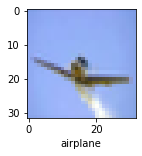

In [28]:
ind = random.randint(0, 10000)
plot_sample(test_img, test_label, ind)
print(f"Prediction is: {classes[classes_label[ind]]} \n Accuracy is {accuracy_score(test_label, classes_label)*100}")

## Taking predictions in outside image

In [29]:
import cv2

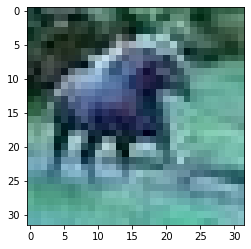

In [30]:
path = '/home/user/Documents/Image Processing/Artificial Neural Network/CIFAR10/Data/horse03.jpg'
new_img = cv2.imread(path)
plt.imshow(new_img)

## Reshaping image

In [31]:
new_img = new_img.reshape(-1, 32, 32, 3)

## Prediction and verifying image

In [32]:
pred_label = cnn.predict(new_img)

1/1 [==============================] - 0s 45ms/step


In [33]:
classes_label = np.argmax(pred_label)
print(classes_label)

1


In [34]:
classes[classes_label]

'automobile'